In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
aisles = pd.read_csv('aisles.csv')
departments = pd.read_csv('departments.csv')
prior = pd.read_csv('order_products__prior.csv')
train = pd.read_csv('order_products_train.csv')
orders = pd.read_csv('orders.csv')
products = pd.read_csv('products.csv')

In [20]:
# create merged dataframe of all orders

all_orders = pd.concat([prior,train],axis = 0)
all_orders = all_orders.merge(products[['product_id','aisle_id','department_id']], how = 'inner', on = 'product_id')
all_orders = all_orders.merge(aisles, on = 'aisle_id')
all_orders = all_orders.merge(departments, on = 'department_id')
all_orders = all_orders.merge(orders[['order_id','user_id']], on = 'order_id')
all_orders = all_orders.merge(products[['product_id','product_name']], on = 'product_id')

In [19]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [3]:
all_orders.head()

,order_id,product_id,add_to_cart_order,reordered,aisle_id,department_id,aisle,department,user_id
0,2,33120,1,1,86,16,eggs,dairy eggs,202279
1,2,28985,2,1,83,4,fresh vegetables,produce,202279
2,2,17794,6,1,83,4,fresh vegetables,produce,202279
3,2,43668,9,0,123,4,packaged vegetables fruits,produce,202279
4,2,9327,3,0,104,13,spices seasonings,pantry,202279


In [ ]:
# distribution of orders/custer
# distribution of items ordered/custer
# most popular aisles
# most popular items
# how many customers, how many orders, how many items, how many aisles
# number of items/order
# when do people order

Get handle on size of data- how many customers, products, aisles and orders are we dealing with?

In [9]:
# size of data stats

print(str(len(all_orders.user_id.unique())) +' customers')
print(str(len(all_orders.order_id.unique())) +' order')
print(str(len(all_orders.aisle_id.unique())) +' aisles')
print(str(len(all_orders.product_id.unique())) +' products')

206209 customers
3346083 order
134 aisles
49685 products


Which aisles and products are popular?

[Text(0, 0, 'fresh vegetables'),
 Text(0, 0, 'fresh fruits'),
 Text(0, 0, 'packaged vegetables fruits'),
 Text(0, 0, 'yogurt'),
 Text(0, 0, 'packaged cheese'),
 Text(0, 0, 'chips pretzels'),
 Text(0, 0, 'water seltzer sparkling water'),
 Text(0, 0, 'milk'),
 Text(0, 0, 'frozen produce'),
 Text(0, 0, 'bread')]

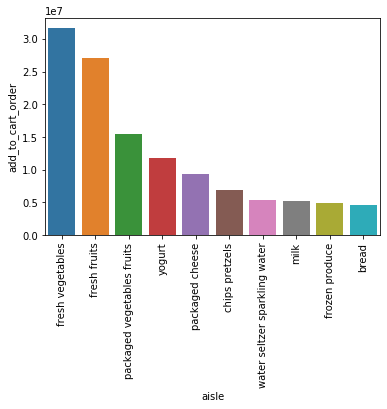

In [18]:
# most popular aisles in terms of units ordered

x = sns.barplot(data = all_orders.groupby('aisle')['add_to_cart_order'].sum().sort_values(ascending = False).reset_index()[0:10], x = 'aisle', y = 'add_to_cart_order')
x.set_xticklabels(x.get_xticklabels(), rotation = 90)

[Text(0, 0, 'fresh vegetables'),
 Text(0, 0, 'fresh fruits'),
 Text(0, 0, 'packaged vegetables fruits'),
 Text(0, 0, 'yogurt'),
 Text(0, 0, 'packaged cheese'),
 Text(0, 0, 'chips pretzels'),
 Text(0, 0, 'water seltzer sparkling water'),
 Text(0, 0, 'milk'),
 Text(0, 0, 'frozen produce'),
 Text(0, 0, 'bread')]

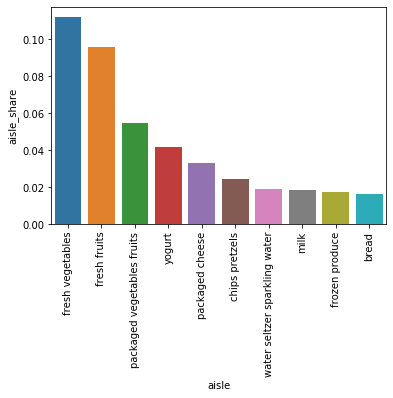

In [29]:
# create barchart showing share instead of units for top aisles

aisle_share = all_orders.groupby('aisle')['add_to_cart_order'].sum().reset_index()
aisle_share['aisle_share'] = aisle_share['add_to_cart_order']
aisle_share['aisle_share'] = aisle_share['aisle_share'].apply(lambda x: x / aisle_share['add_to_cart_order'].sum())

x = sns.barplot(data = aisle_share.sort_values(by = 'aisle_share',ascending = False)[0:10], x = 'aisle', y = 'aisle_share')
x.set_xticklabels(x.get_xticklabels(), rotation = 90)

[Text(0, 0, 'Banana'),
 Text(0, 0, 'Bag of Organic Bananas'),
 Text(0, 0, 'Organic Strawberries'),
 Text(0, 0, 'Organic Baby Spinach'),
 Text(0, 0, 'Organic Hass Avocado'),
 Text(0, 0, 'Large Lemon'),
 Text(0, 0, 'Limes'),
 Text(0, 0, 'Organic Avocado'),
 Text(0, 0, 'Strawberries'),
 Text(0, 0, 'Organic Raspberries')]

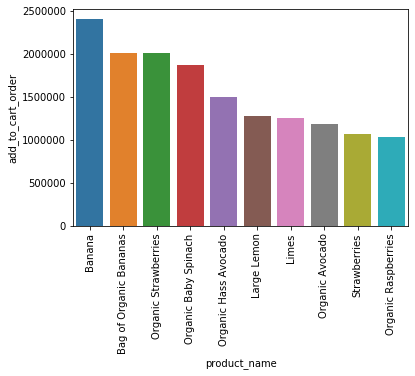

In [22]:
# most popular items in terms of units ordered

x = sns.barplot(data = all_orders.groupby('product_name')['add_to_cart_order'].sum().sort_values(ascending = False).reset_index()[0:10], x = 'product_name', y = 'add_to_cart_order')
x.set_xticklabels(x.get_xticklabels(), rotation = 90)

[Text(0, 0, 'Banana'),
 Text(0, 0, 'Bag of Organic Bananas'),
 Text(0, 0, 'Organic Strawberries'),
 Text(0, 0, 'Organic Baby Spinach'),
 Text(0, 0, 'Organic Hass Avocado'),
 Text(0, 0, 'Large Lemon'),
 Text(0, 0, 'Limes'),
 Text(0, 0, 'Organic Avocado'),
 Text(0, 0, 'Strawberries'),
 Text(0, 0, 'Organic Raspberries'),
 Text(0, 0, 'Organic Yellow Onion'),
 Text(0, 0, 'Organic Garlic'),
 Text(0, 0, 'Organic Zucchini'),
 Text(0, 0, 'Organic Blueberries'),
 Text(0, 0, 'Organic Grape Tomatoes'),
 Text(0, 0, 'Organic Whole Milk'),
 Text(0, 0, 'Cucumber Kirby'),
 Text(0, 0, 'Organic Lemon'),
 Text(0, 0, 'Organic Cucumber'),
 Text(0, 0, 'Seedless Red Grapes'),
 Text(0, 0, 'Organic Baby Carrots'),
 Text(0, 0, 'Fresh Cauliflower'),
 Text(0, 0, 'Apple Honeycrisp Organic'),
 Text(0, 0, 'Organic Cilantro'),
 Text(0, 0, 'Organic Red Onion'),
 Text(0, 0, 'Organic Fuji Apple'),
 Text(0, 0, 'Carrots'),
 Text(0, 0, 'Organic Small Bunch Celery'),
 Text(0, 0, 'Organic Baby Arugula'),
 Text(0, 0, 'Yellow O

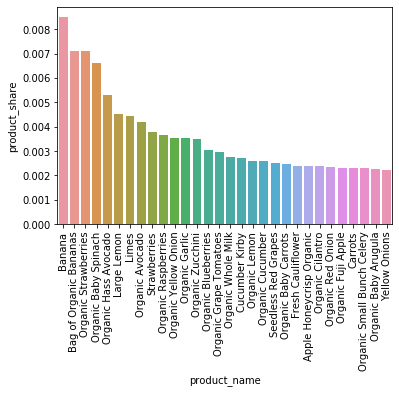

In [35]:
# create barchart showing share instead of units for top products

product_share = all_orders.groupby('product_name')['add_to_cart_order'].sum().reset_index()
product_share['product_share'] = product_share['add_to_cart_order']
product_share['product_share'] = product_share['product_share'].apply(lambda x: x / product_share['add_to_cart_order'].sum())

x = sns.barplot(data = product_share.sort_values(by = 'product_share',ascending = False)[0:30], x = 'product_name', y = 'product_share')
x.set_xticklabels(x.get_xticklabels(), rotation = 90)

User summary statistics- how much, how often, when do people order?

In [46]:
# summary of number of orders by user

all_orders.groupby('user_id')['order_id'].nunique().describe()

count    206209.000000
mean         16.226658
std          16.662238
min           3.000000
25%           6.000000
50%          10.000000
75%          20.000000
max         100.000000
Name: order_id, dtype: float64

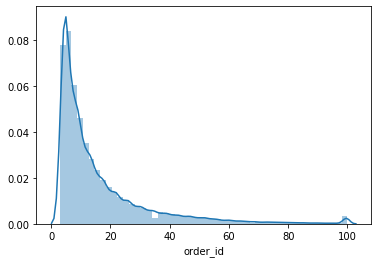

In [44]:
# distribution plot of orders/user

sns.distplot(all_orders.groupby('user_id')['order_id'].nunique())

In [47]:
# summary of units ordered/customer over the year

all_orders.groupby('user_id')['add_to_cart_order'].sum().describe()

count    206209.000000
mean       1372.342643
std        2489.390476
min           3.000000
25%         203.000000
50%         568.000000
75%        1483.000000
max      138990.000000
Name: add_to_cart_order, dtype: float64

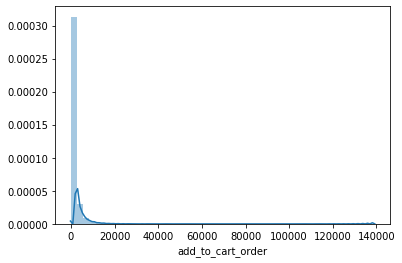

In [49]:
# distplot of number of units ordered/customer ordered over the year

sns.distplot(all_orders.groupby('user_id')['add_to_cart_order'].sum())

In [50]:
# summary of order size

all_orders.groupby('order_id')['add_to_cart_order'].sum().describe()

count    3.346083e+06
mean     8.457334e+01
std      1.355298e+02
min      1.000000e+00
25%      1.500000e+01
50%      3.600000e+01
75%      1.050000e+02
max      1.058500e+04
Name: add_to_cart_order, dtype: float64

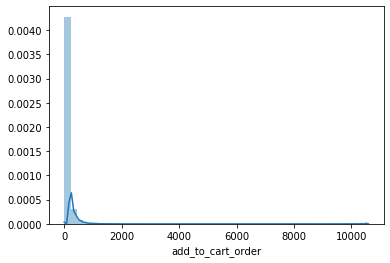

In [51]:
# distplot of number of units/order

sns.distplot(all_orders.groupby('order_id')['add_to_cart_order'].sum())

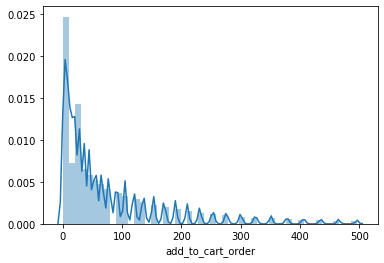

In [58]:
# cutoff previous distplot 500 units

order_size = all_orders.groupby('order_id')['add_to_cart_order'].sum().reset_index()

sns.distplot(order_size[order_size['add_to_cart_order'] < 500]['add_to_cart_order'])

In [65]:
# summary statistics for average time between orders by user

orders.groupby('user_id')['days_since_prior_order'].mean().describe()

count    206209.000000
mean         15.448686
std           6.915575
min           0.000000
25%           9.814815
50%          15.000000
75%          20.625000
max          30.000000
Name: days_since_prior_order, dtype: float64

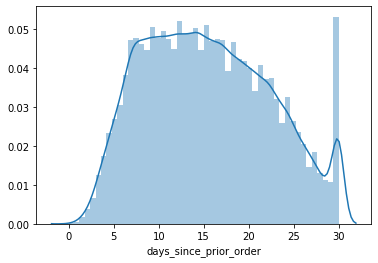

In [64]:
# distplot for time between orders

sns.distplot(orders.groupby('user_id')['days_since_prior_order'].mean())